Classificação de Imóveis: O conjunto de dados será processado para separar os imóveis em duas categorias: Comerciais e Residenciais.

Geração de CSV Consolidado: Será criado um novo arquivo CSV contendo as informações dos imóveis, destacando o atributo mais frequente (ou predominante) encontrado em cada um dos grupos (Comercial e Residencial).

Cálculo de Despesas: Serão adicionadas duas novas colunas ao dataset para ambos os tipos de imóveis (residenciais e comerciais):

Gasto Mensal

Gasto Anual

Essas colunas serão preenchidas com base nos dados de despesas fornecidos.

Análise e Visualização Gráfica: Será gerado um gráfico para demonstrar a distribuição dos valores de aluguéis por tipo de imóvel (residencial e comercial).

Destaque de Atributos por Área: Após a separação inicial, será criada uma nova coluna para identificar e destacar as características predominantes nos imóveis (residenciais e comerciais) que possuem área superior a 70m.

In [1]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
df = pd.read_csv(url, sep=';')

df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


Iremos iniciar serapando os imoveis comerciais dos imóveis residenciais.

In [2]:
#Usamos o método unique para ver o que tem na coluna tipo.
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [3]:
#Iremos criar um lista com todos os imveis residencias.
imoveis_residenciais = [
    'Quitinete',
    'Casa',
    'Apartamento',
    'Casa de Condomínio',
    'Flat',
    'Casa de Vila',
    'Loft',
    'Chácara',
    'Sítio'
]

In [4]:
#Estamos consultando os imóveis que tem os mesmos elementos da lista na coluna tipo e criando um novo dataframe.
residenciais = df.query('@imoveis_residenciais in Tipo')
residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [5]:
#Estamos consultando os imóveis que tem elementos diferentes da lista na coluna tipo e criando um novo dataframe.
comerciais = df.query('@imoveis_residenciais not in Tipo')
comerciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


Agora iremos tratar dos valores ausentes (NaN) que existem nos dataframes de comerciais e residenciais colocando todos em zero.

In [6]:
#Conferindo em casa coluna quantos elementos NaN's tem.
residenciais.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1874
IPTU          6885
dtype: int64

In [7]:
comerciais.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            8
Condominio    2219
IPTU          3352
dtype: int64

In [8]:
#Criando um novo dataframe com as colunas linhas que estão em NaN iguais a zero.
residenciais = residenciais.fillna(0)
comerciais = comerciais.fillna(0)

Agora iremos excluir as linhas que estão em zero das colunas valor e condominio de imoveis residencias.
Essa operação não será feita em imoveis comerciais, pois existem imóveis que não são pagos condominio e nem valor de aluguel.

In [9]:
#Indentificando as linhas das colunas valor e condominio que estão iguais a zero
remover_residenciais = residenciais.query('Valor == 0 or Condominio == 0').index
remover_residenciais

Index([    1,     5,     7,     8,    10,    18,    31,    76,   113,   117,
       ...
       32732, 32739, 32778, 32804, 32809, 32859, 32865, 32893, 32911, 32931],
      dtype='int64', length=1881)

In [10]:
#Foram removidas as linhas das colunas valor e condominio que estivessem iguais a zero referente aos imoveis residenciais.
residenciais.drop(remover_residenciais, axis=0, inplace=True)

Esboçando um gráfico com os dados das médias de valores residenciais e comerciais.

<Axes: xlabel='Tipo'>

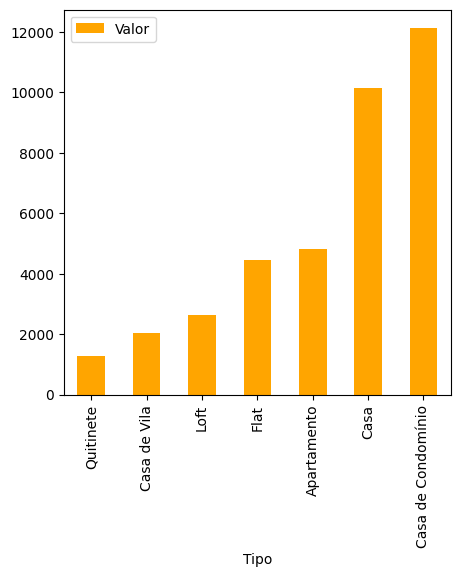

In [13]:
#Agrupando a coluna tipo e valor e gerando um grafico com elas
residenciais_tipo_valor = residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

residenciais_tipo_valor.plot(kind='bar', figsize=(5, 5), color='orange')

<Axes: ylabel='Tipo'>

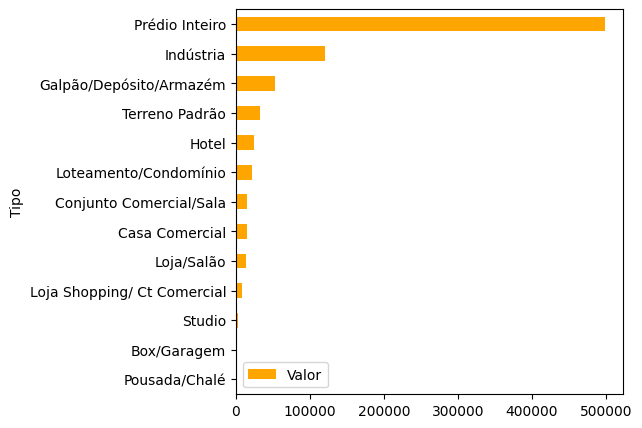

In [14]:
#Agrupando a coluna tipo e valor e gerando um grafico com elas.
comerciais_tipo_valor = comerciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

comerciais_tipo_valor.plot(kind='barh', figsize=(5, 5), color='orange')

Criando uma nova coluna em residenciais e comerciais que destacam os gatos mensais e anuais com os imóveis

In [ ]:
#Criando uma nova coluna com os gastos mensais.
residenciais['Gasto mensal'] = residenciais['Valor'] + residenciais['Condominio']
residenciais

In [ ]:
#Criando uma nova coluna com os gastos anuais.
residenciais['Gasto anual'] = (residenciais['Valor'] + residenciais['Condominio'] * 12) + residenciais['IPTU']
residenciais

In [ ]:
comerciais['Gasto mensal'] = comerciais['Valor'] + comerciais['Condominio']
comerciais

In [ ]:
comerciais['Gasto anual'] = (comerciais['Valor'] + comerciais['Condominio'] * 12) + comerciais['IPTU']
comerciais

In [ ]:
#Selecionando o elemento mais predominante dos imoveis residenciais e excluindo a coluna tipo.
apartamentos = residenciais.query('Tipo == "Apartamento"')
apartamentos.drop('Tipo', axis=1, inplace=True)
apartamentos

In [ ]:
#Selecionando o elemento mais predominante dos imoveis comerciais e excluindo a coluna tipo.
conjunto_comercial_sala = comerciais.query('Tipo == "Conjunto Comercial/Sala"')
conjunto_comercial_sala.drop('Tipo', axis=1, inplace=True)
conjunto_comercial_sala

In [ ]:
#Destacando apartamentos com mais de 70m.
apartamentos['Area maior 70m'] = apartamentos['Area'].apply(lambda x: 'Sim' if x > 70  else 'Não')
apartamentos

In [ ]:
#Destacando conjunto comercial/sala com mais de 70m.
conjunto_comercial_sala['Area maior 70m'] = conjunto_comercial_sala['Area'].apply(lambda x: 'Sim' if x > 70  else 'Não')
conjunto_comercial_sala

In [ ]:
#Salvando os dados de apartamento
apartamentos.to_csv('apartamentos.csv', index=False)


In [ ]:
# Salvando os dados de conjunto comercial/sala
conjunto_comercial_sala.to_csv('conjuntoCS.csv', index=False)